In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image, display

Mounted at /content/drive


# NetworkX
Это удобная библиотека для построения, анализа и визуализации графов. Она подходит для исследования небольших графов и их математического анализа.

**Основные возможности NetworkX**
- Создание графов (направленных, ненаправленных, взвешенных, мультирёберных, графы знаний).
- Вычисление графовых метрик (степени узлов, центральности, кратчайшие пути, Поиск сообществ, Диаметры и радиусы графа, Кластерный коэффициент).
- Работа с атрибутами узлов и рёбер.
- Визуализация графов.

Примеры использования NetworkX

## Создание различных типов графов и их анализ


**Обычный граф**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Степень узлов: {'Alice': 3, 'Bob': 2, 'Charlie': 2, 'Diana': 3}


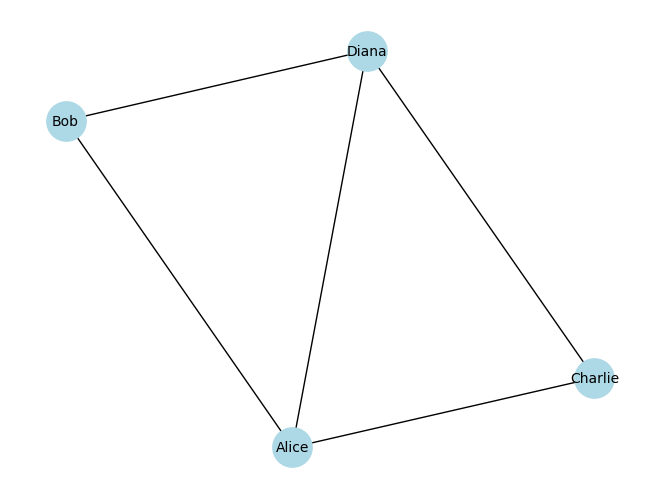

In [ ]:
# Создание ненаправленного графа
G = nx.Graph()

# Добавление узлов
G.add_nodes_from(["Alice", "Bob", "Charlie", "Diana"])

# Добавление рёбер
G.add_edges_from([
    ("Alice", "Bob"),
    ("Alice", "Charlie"),
    ("Bob", "Diana"),
    ("Alice", "Diana"),
    ("Charlie", "Diana")])

# Вывод степени каждого узла
print("Степень узлов:", dict(G.degree()))

# Визуализация графа
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.show()



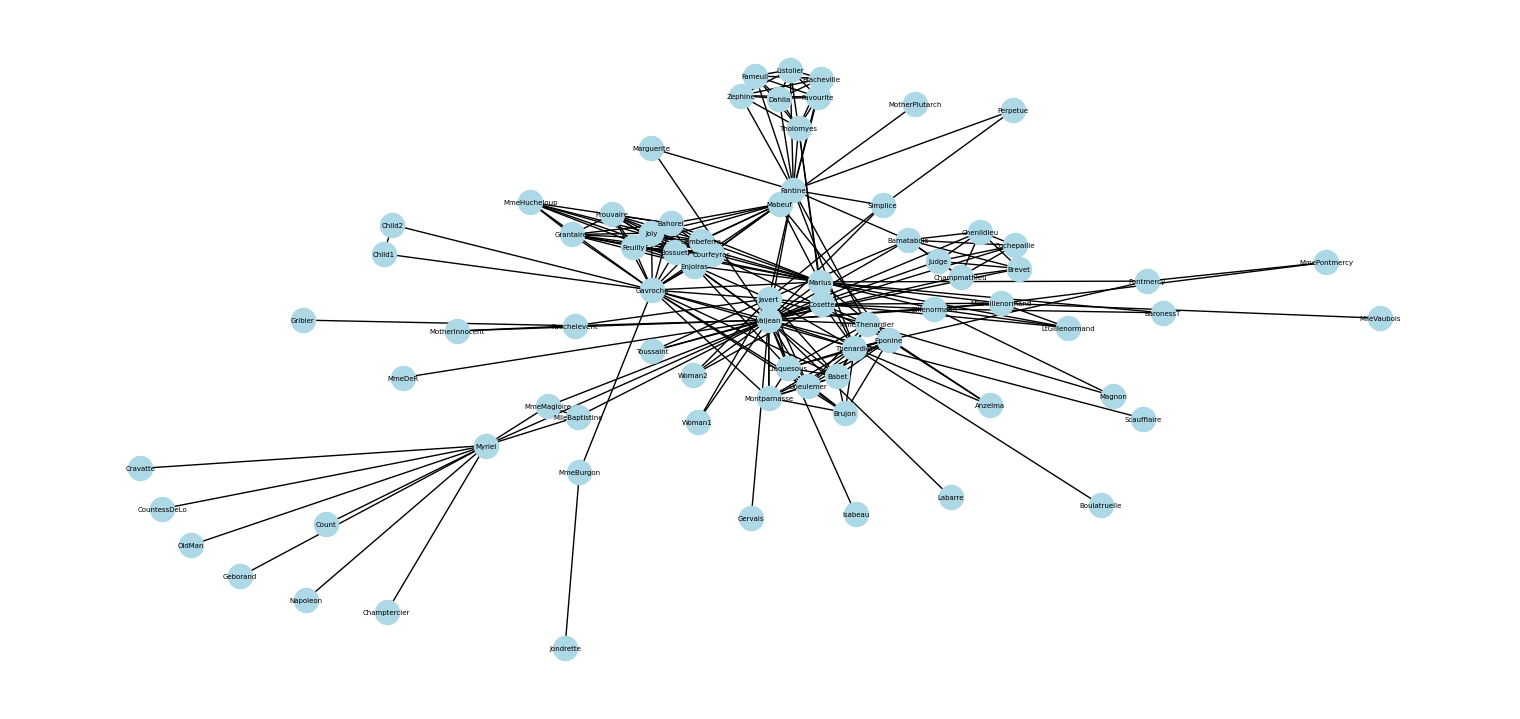

In [ ]:
G = nx.les_miserables_graph()

# Визуализация графа
plt.figure(figsize=(15,7))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=300, font_size=5)
plt.show()


### circular_layout

Располагает все вершины по окружности на равном расстоянии друг от друга.

Не учитывает структуру графа — связи не влияют на расположение.

Полезен, когда важно видеть симметрию, связи и рёбра между всеми вершинами.

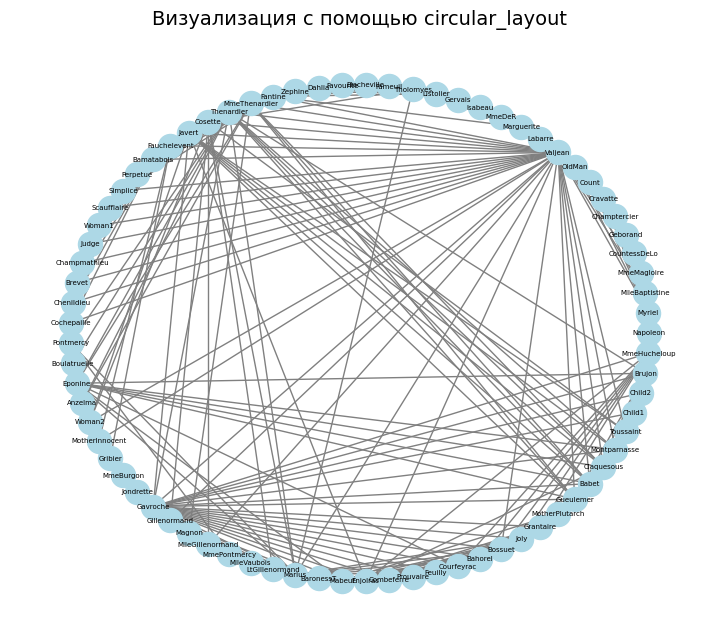

In [ ]:

# вычисляем координаты узлов в виде круга
pos = nx.circular_layout(G)

# визуализируем
plt.figure(figsize=(7, 6))
nx.draw(
    G,
    pos,
    node_size=300,
    node_color='lightblue',
    edge_color='gray',
    with_labels=True,
    font_size=5
)
plt.title("Визуализация с помощью circular_layout", fontsize=14)
plt.show()


### spring_layout

одна из самых популярных функций в NetworkX для визуализации графов.
Она отвечает за то, как расположить вершины на плоскости, чтобы граф выглядел “естественно” и читаемо

Что делает spring_layout?

- Она расставляет узлы графа в пространстве, используя модель силового взаимодействия (force-directed layout)

Ссылка на источник - ps://arxiv.org/pdf/2412.20317

In [ ]:
pos = nx.spring_layout(
    G,
    k=None,         # “желаемое расстояние” между узлами
    iterations=50,  # сколько итераций сделать для “релаксации”
    seed=42,
    dim=2,          # размерность — обычно 2, но можно и 3
    weight='weight' # атрибут ребра, используемый как сила притяжения
)

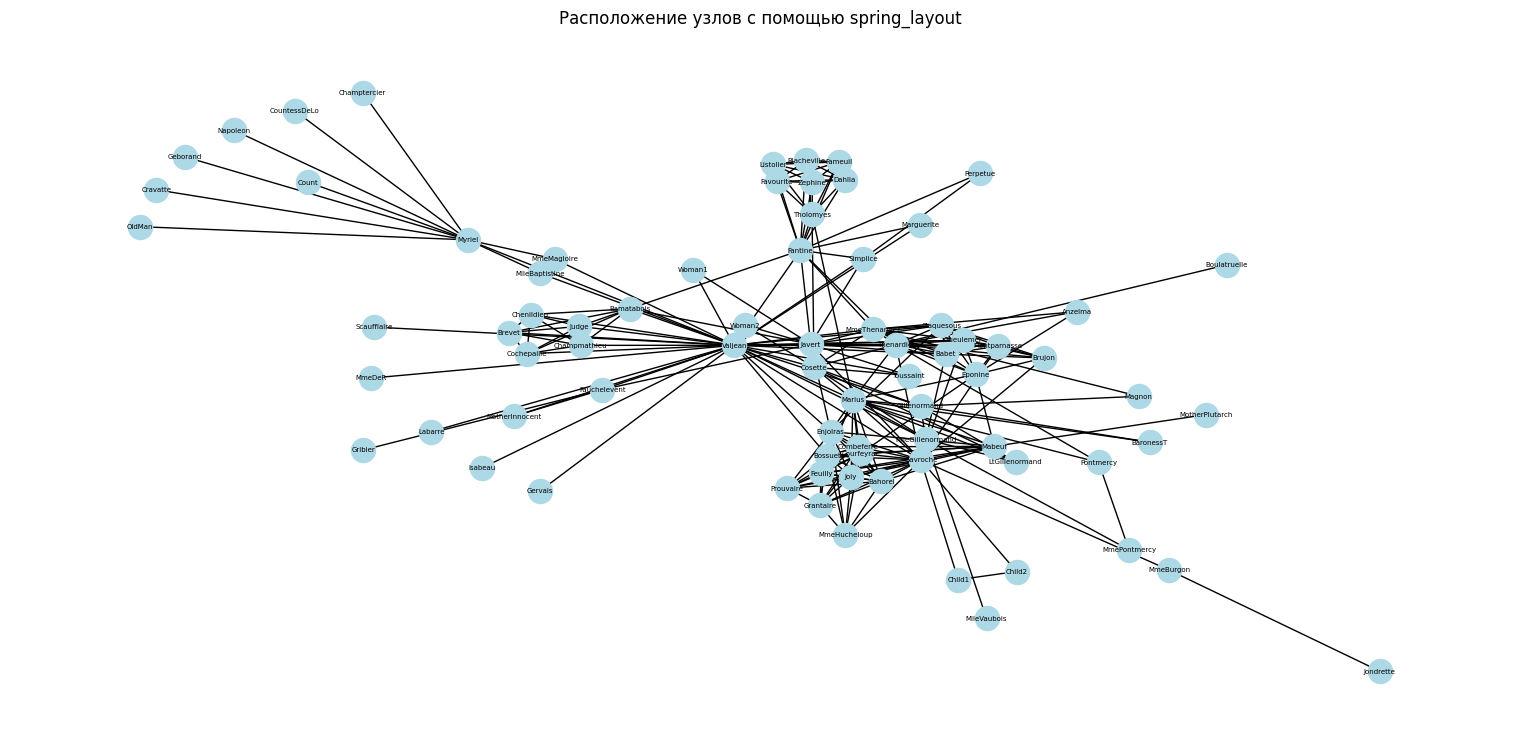

In [ ]:
plt.figure(figsize=(15, 7))
nx.draw(G, pos, node_size=300, node_color='lightblue', with_labels=True, font_size=5)
plt.title("Расположение узлов с помощью spring_layout")
plt.show()


### kamada_kawai_layout

Алгоритм пытается расположить вершины так, чтобы расстояния на плоскости соответствовали графовым расстояниям (по количеству рёбер).

То есть вершины, которые близки по структуре графа, окажутся ближе и на картинке.

Работает как оптимизация энергии пружин, но с более точной физической моделью, чем spring_layout.

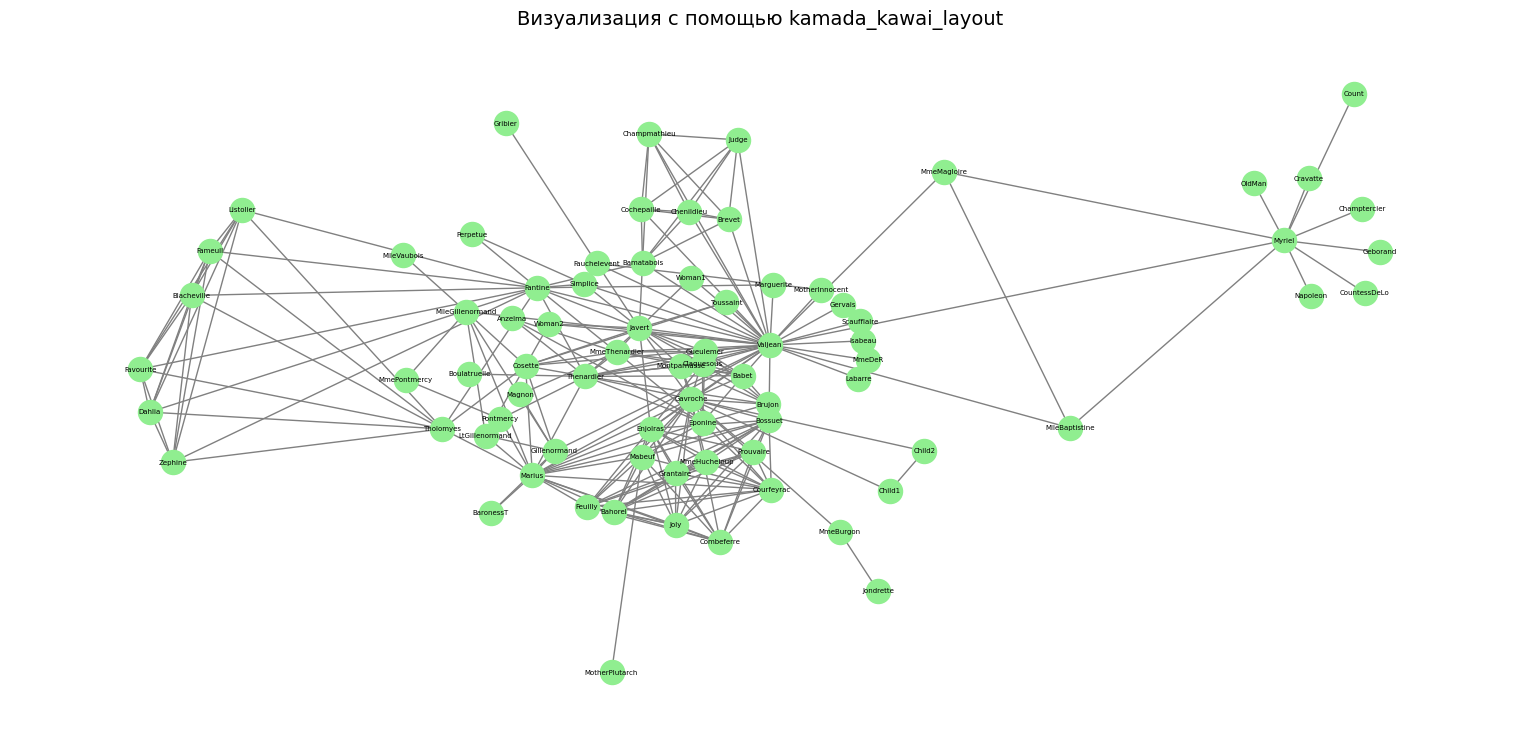

In [ ]:
# вычисляем координаты узлов по алгоритму Kamada–Kawai
pos = nx.kamada_kawai_layout(G)

# визуализируем граф
plt.figure(figsize=(15, 7))
nx.draw(
    G,
    pos,
    node_size=300,
    node_color='lightgreen',
    edge_color='gray',
    with_labels=True,
    font_size=5
)
plt.title("Визуализация с помощью kamada_kawai_layout", fontsize=14)
plt.show()

### spectral_layout

- основан не на “физической” модели, а на линейной алгебре и спектральных свойствах графа.

- Использует собственные векторы (eigenvectors) матричного Лапласиана графа для определения координат узлов.

По сути, узлы “раскладываются” в пространстве так, чтобы сохранить глобальную структуру графа.

Часто используется для обнаружения кластеров и сообществ, так как спектральные компоненты хорошо отражают скрытые группы связей.

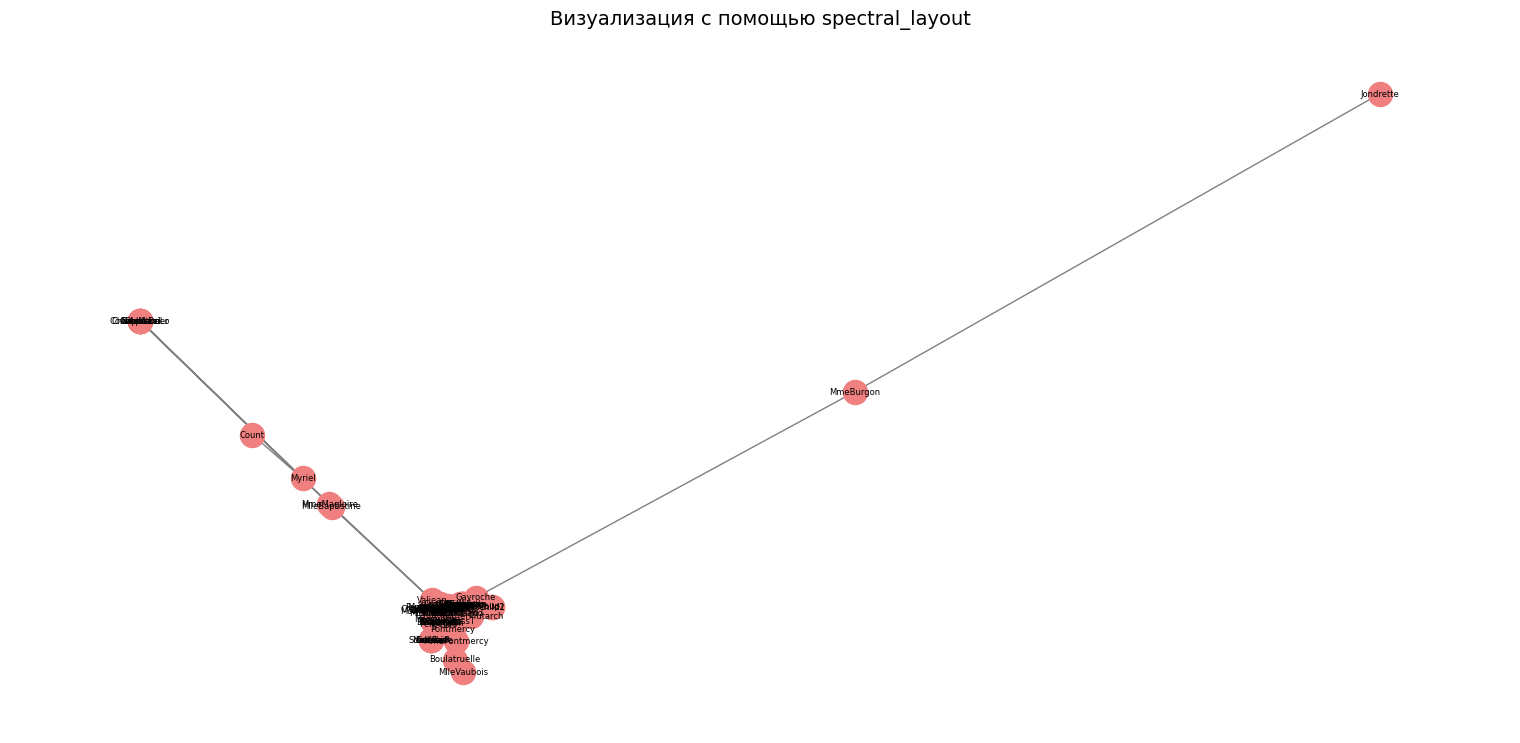

In [ ]:
# вычисляем координаты узлов с помощью спектрального разложения
pos = nx.spectral_layout(G)

# визуализируем граф
plt.figure(figsize=(15, 7))
nx.draw(
    G,
    pos,
    node_size=300,
    node_color='lightcoral',
    edge_color='gray',
    with_labels=True,
    font_size=6
)
plt.title("Визуализация с помощью spectral_layout", fontsize=14)
plt.show()

### Сравнение схем расположения узлов в NetworkX

| Layout | Основная идея | Визуальные свойства | Преимущества | Недостатки |
|:--|:--|:--|:--|:--|
| **spring_layout** | Модель пружин:<br>узлы отталкиваются, рёбра притягивают | Естественное, сбалансированное<br>расположение без наложений | Универсален,<br>хорошо показывает кластеры | Медленный<br>на больших графах |
| **circular_layout** | Располагает вершины<br>по окружности | Симметричное и равномерное<br>расположение | Простой и читаемый,<br>подходит для демонстраций | Не отражает структуру,<br>часто пересекаются рёбра |
| **kamada_kawai_layout** | Минимизирует «энергию» системы,<br>приближая графовые расстояния к евклидовым | Симметричное,<br>визуально чистое | Красивое и устойчивое<br>расположение узлов | Медленный при<br>числе узлов > 300 |
| **spectral_layout** | Использует собственные векторы<br>матрицы Лапласа | Отражает глобальную структуру<br>и кластеры | Основан на строгих<br>математических принципах | Может «сплющивать» граф<br>и терять локальные детали |

---

**Резюме:**
- `spring_layout` — универсальный и сбалансированный по качеству и скорости.  
- `circular_layout` — симметричный, но не отражает структуру графа.  
- `kamada_kawai_layout` — подходит для аккуратных визуализаций малых графов.  
- `spectral_layout` — полезен для анализа глобальных структур и кластеров.



## Варианты представления графов

Матрица смежности

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


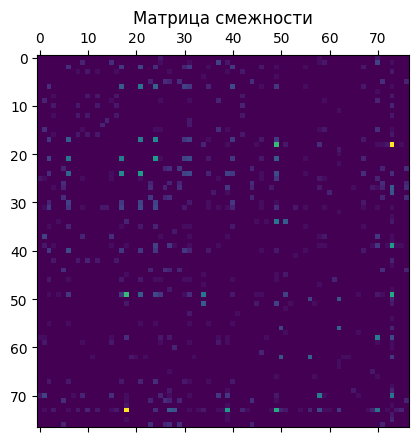

In [ ]:
A = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
print(A.astype(int))
plt.matshow(A)
plt.title("Матрица смежности")
plt.show()


Список смежности

In [ ]:
for node in sorted(G.nodes()):
    print(f"{node}: {sorted(G.neighbors(node))}")

Список рёбер

In [ ]:
edge_list = sorted(G.edges())
# edge_list

Вычисление кратчайшего пути

In [ ]:
# Находим кратчайший путь между двумя узлами
shortest_path = nx.shortest_path(G, source="Marius", target="Perpetue")
print("Кратчайший путь от Marius до Perpetue:", shortest_path)


Кратчайший путь от Marius до Perpetue: ['Marius', 'Tholomyes', 'Fantine', 'Perpetue']


**Взвешенный граф**

Веса рёбер: {('A', 'B'): 1, ('A', 'C'): 10, ('B', 'C'): 2}
Кратчайший путь по весам: ['A', 'B', 'C']


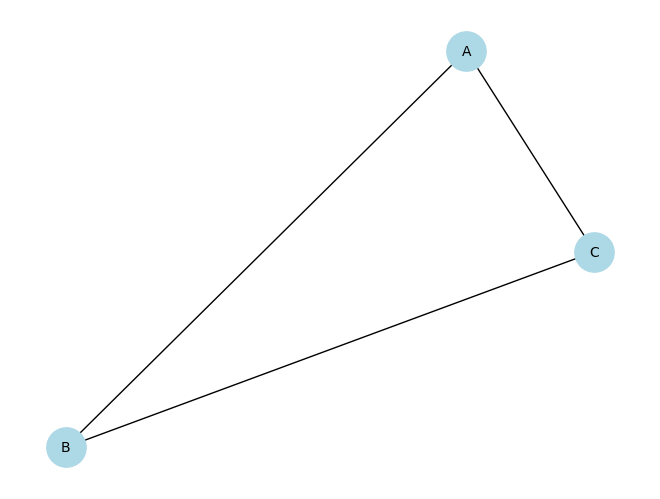

In [ ]:
# Создание взвешенного графа
G = nx.Graph()
G.add_edge("A", "B", weight=1)
G.add_edge("B", "C", weight=2)
G.add_edge("A", "C", weight=10)

# Получение весов рёбер
weights = nx.get_edge_attributes(G, 'weight')
print("Веса рёбер:", weights)

# Вычисление кратчайшего пути с учётом веса
shortest_weighted_path = nx.shortest_path(G, source="A", target="C", weight="weight")
print("Кратчайший путь по весам:", shortest_weighted_path)

# Визуализация графа
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.show()

**Направленный граф (Directed Graph)**

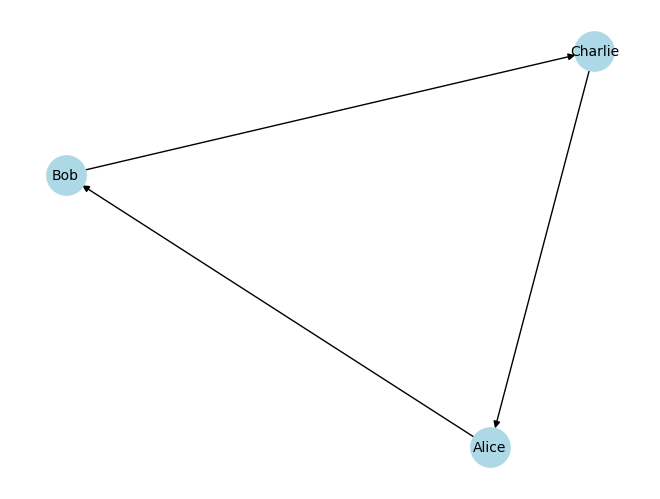

Рёбра направленного графа: [('Alice', 'Bob'), ('Bob', 'Charlie'), ('Charlie', 'Alice')]


In [ ]:
# Создание направленного графа
DG = nx.DiGraph()

# Добавление узлов и рёбер с направлением
DG.add_edges_from([
    ("Alice", "Bob"),
    ("Bob", "Charlie"),
    ("Charlie", "Alice")
])

# Визуализация направленного графа
nx.draw(DG, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.show()

# Вывод всех рёбер и их направления
print("Рёбра направленного графа:", list(DG.edges))


**Мультирёберный граф (MultiGraph)**

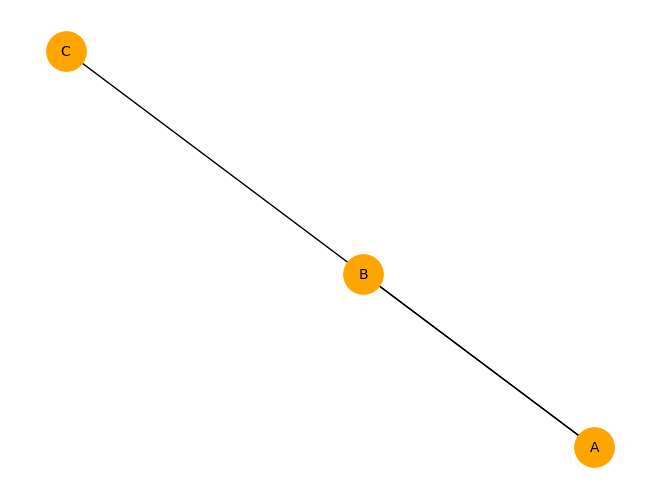

Количество рёбер между A и B: 2


In [ ]:
# Создание мультирёберного графа
MG = nx.MultiGraph()

# Добавление нескольких рёбер между одной парой узлов
MG.add_edges_from([("A", "B"), ("A", "B"), ("B", "C")])

# Визуализация мультирёберного графа
nx.draw(MG, with_labels=True, node_color="orange", node_size=800, font_size=10)
plt.show()

# Количество рёбер между узлами
print("Количество рёбер между A и B:", MG.number_of_edges("A", "B"))


**Граф знаний (Knowledge Graph)**

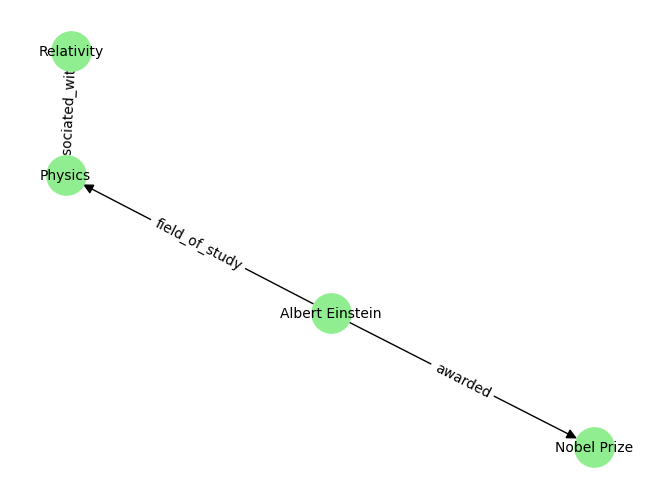

Albert Einstein -> Physics (Relation: field_of_study)
Albert Einstein -> Nobel Prize (Relation: awarded)
Physics -> Relativity (Relation: associated_with)


In [ ]:
# Создание графа знаний
KG = nx.DiGraph()

# Добавление узлов и рёбер
KG.add_edge("Albert Einstein", "Physics", relation="field_of_study")
KG.add_edge("Albert Einstein", "Nobel Prize", relation="awarded")
KG.add_edge("Physics", "Relativity", relation="associated_with")

# Визуализация графа знаний
pos = nx.spring_layout(KG)
nx.draw(KG, pos, with_labels=True, node_color="lightgreen", node_size=800, font_size=10, arrowsize=15)
edge_labels = nx.get_edge_attributes(KG, "relation")
nx.draw_networkx_edge_labels(KG, pos, edge_labels=edge_labels)
plt.show()

# Вывод информации о графе знаний
for edge in KG.edges(data=True):
    print(f"{edge[0]} -> {edge[1]} (Relation: {edge[2]['relation']})")


## Вычисление графовых метрик

/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1296: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


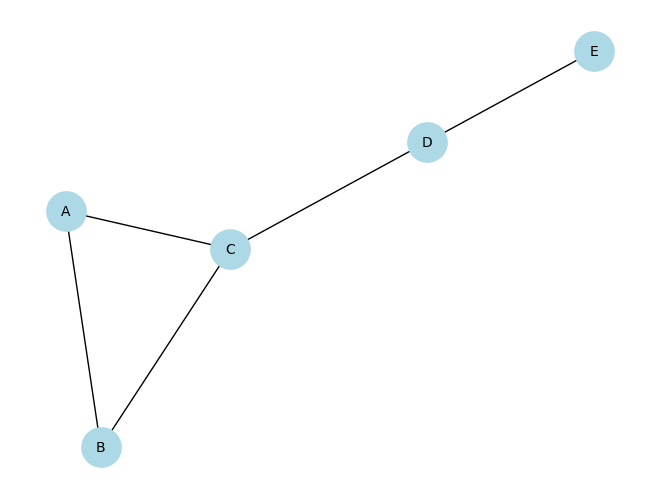

In [ ]:
# Создание примерного графа
G = nx.Graph()
G.add_edges_from([("A", "B"), ("B", "C"), ("A", "C"), ("C", "D"), ("D", "E")])

# Визуализация графа
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, arrowsize=20, font_size=10)
plt.show()

### Центральность узлов

**Центральность узлов** — общее название для набора метрик, которые позволяют оценить, насколько «важным» или «центральным» является тот или иной узел в графе. В «важность» могут вкладываться разные смыслы:  
- Насколько узел «прокачан по связям» (degree),  
- Насколько он близок к остальным (closeness),  
- Как часто он лежит на кратчайших путях между другими узлами (betweenness),  
- и т. д.

Ниже некоторые из них

---

#### 1. Центральность по степени (Degree Centrality)

**Degree centrality** - Степенная центральность вершины основана на количестве (или суммарном весе) прямых связей (рёбер) этой вершины с другими. Узел считается «центральным», если он имеет максимальное число прямых контактов, что указывает на его широкую вовлечённость в сеть.





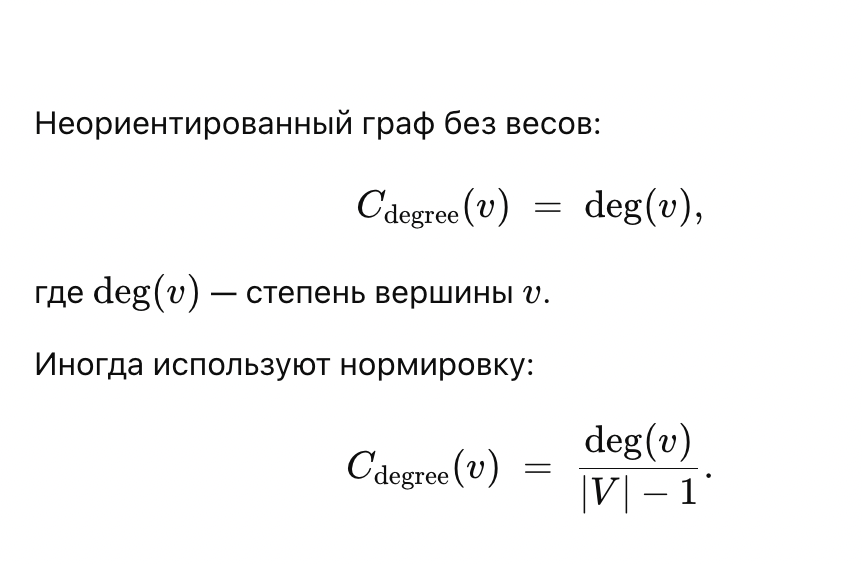

In [ ]:
img_path = '/content/drive/MyDrive/data/Degree_c.png'
display(Image(filename=img_path, width=400))

#### 2. Центральность по близости (Closeness Centrality)



**Closeness centrality** отражает, насколько узел \(v\) «близок» ко всем остальным узлам. Чем меньше суммарное (или среднее) расстояние от \(v\) до всех остальных, тем выше центральность. Считается, что если узел имеет короткие пути до любого другого узла, то информация (или другие ресурсы) могут распространяться через него быстрее.




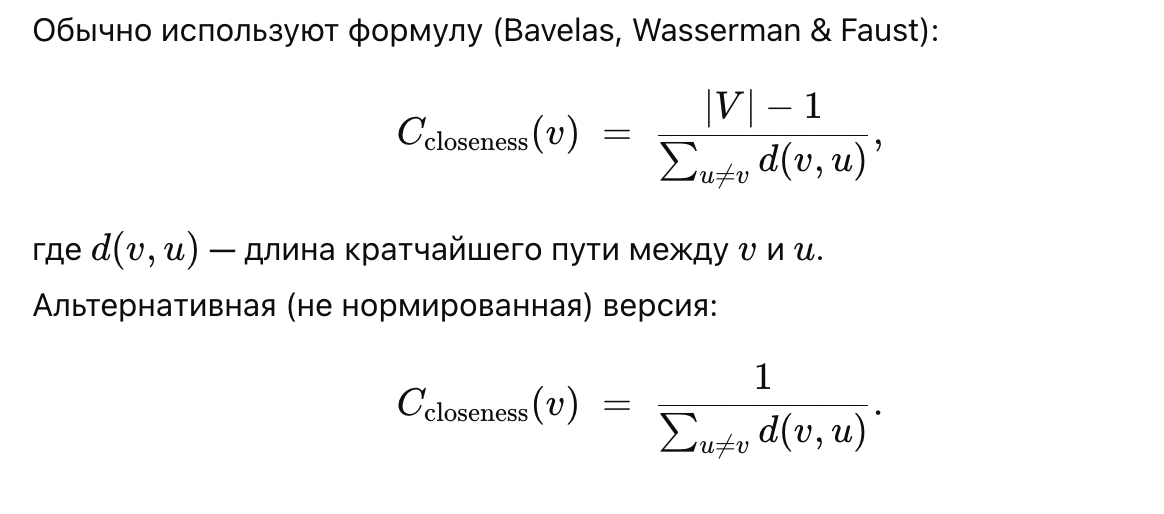

In [ ]:
img_path = '/content/drive/MyDrive/data/Closeness.png'
display(Image(filename=img_path, width=600))

#### 3. Центральность по междуузловой значимости (Betweenness Centrality)

**Betweenness centrality** оценивает, насколько часто узел \(v\) лежит на кратчайших путях между другими парами вершин. (Иными словами, это доля кратчайших путей между парами узлов, которые проходят через данный узел.) Узел с высокой «betweenness» можно считать «критическим посредником» — через него проходит много «трафика» (если представить, что данные текут по кратчайшим путям).






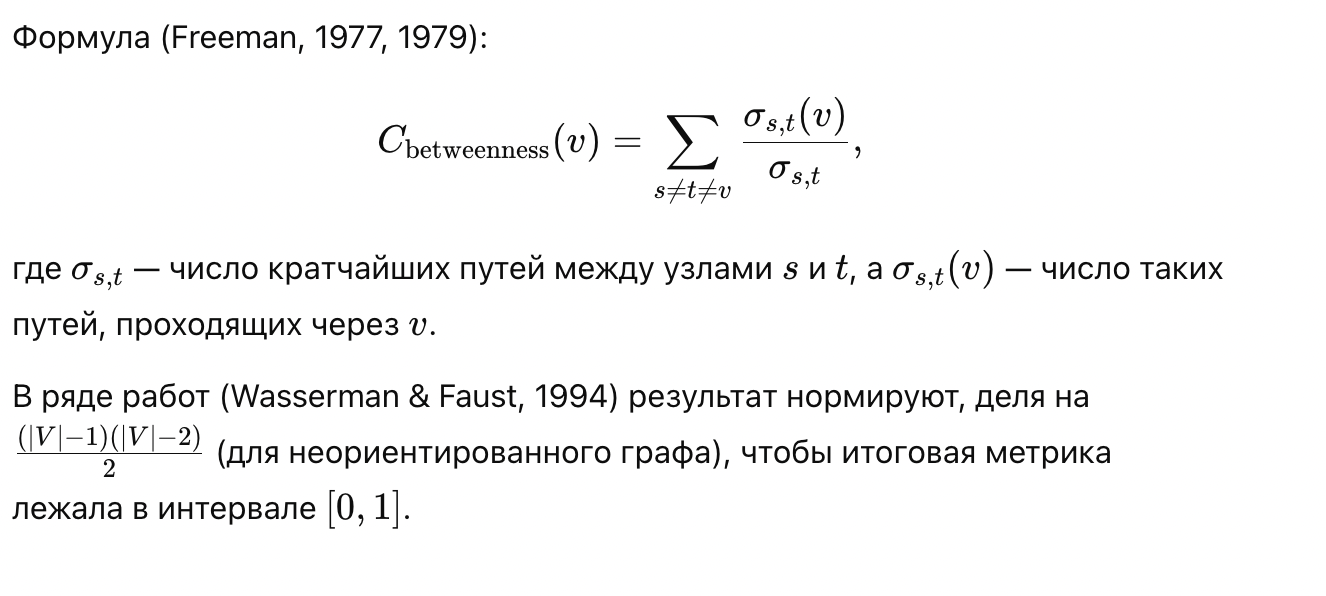

In [ ]:
img_path = '/content/drive/MyDrive/data/Betweenness.png'
display(Image(filename=img_path, width=600))

Все эти метрики реализованы в `networkx`, например:  
- `nx.degree_centrality(G)`  
- `nx.closeness_centrality(G)`  
- `nx.betweenness_centrality(G)`

In [ ]:
# Вычисление центральности по степени (degree centrality)
degree_centrality = nx.degree_centrality(G)
print("Центральность по степени:", degree_centrality)

# Вычисление центральности по близости (closeness centrality)
closeness_centrality = nx.closeness_centrality(G)
print("Центральность по близости:", closeness_centrality)

# Вычисление центральности по междуузловой значимости (betweenness centrality)
betweenness_centrality = nx.betweenness_centrality(G)
print("Центральность по междуузловой значимости:", betweenness_centrality)


Центральность по степени: {'A': 0.5, 'B': 0.5, 'C': 0.75, 'D': 0.5, 'E': 0.25}
Центральность по близости: {'A': 0.5714285714285714, 'B': 0.5714285714285714, 'C': 0.8, 'D': 0.6666666666666666, 'E': 0.4444444444444444}
Центральность по междуузловой значимости: {'A': 0.0, 'B': 0.0, 'C': 0.6666666666666666, 'D': 0.5, 'E': 0.0}


In [ ]:
df_cent = pd.DataFrame({'degree': degree_centrality,
                        'closeness': closeness_centrality,
                        'betweenness': betweenness_centrality}).round(3)
df_cent.loc[sorted(df_cent.index)]


degree  closeness  betweenness
A    0.50      0.571        0.000
B    0.50      0.571        0.000
C    0.75      0.800        0.667
D    0.50      0.667        0.500
E    0.25      0.444        0.000

Результат:

- Центральность по степени показывает, насколько узел связан с другими.
- Центральность по близости измеряет, как быстро узел может достичь других узлов.
- Центральность по междуузловой значимости отражает, через какие узлы проходят важные пути.

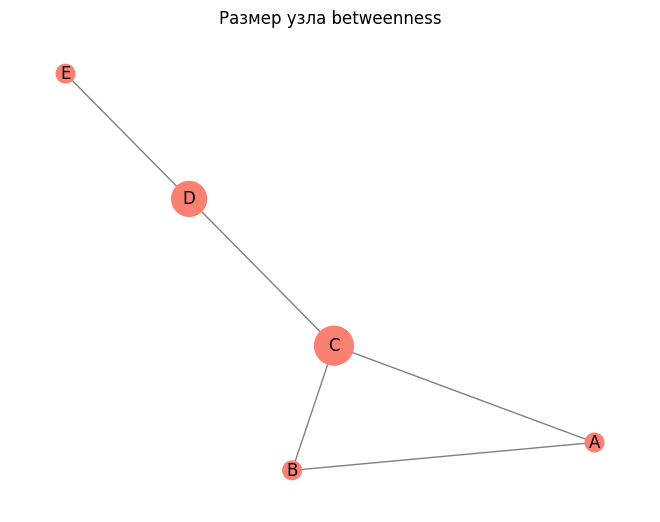

In [ ]:
# Визуализация: размер узла + betweenness
metric = 'betweenness'
vals = df_cent[metric]
vals = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)
sizes = 600 * (0.3 + vals)

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color='salmon', edge_color='gray')
plt.title(f"Размер узла {metric}")
plt.show()


### Кластерный коэффициент

Кластерный коэффициент узла в графе — это мера, показывающая, насколько его соседи также связаны между собой. Это важная характеристика сетей, поскольку она отражает локальную плотность связей вокруг узла.

Рассмотрим следующие метрики:
1. Локальный кластерный коэффициент (Local Clustering Coefficient)
2. Средний кластерный коэффициент графа (Global Clustering Coefficient)
3. Коэффициент транзитивности (Transitivity Coefficient)


#### Локальный кластерный коэффициент (Local Clustering Coefficient)

**Local Clustering Coefficient** для каждой вершины
𝑣 в неориентированном графе
𝐺=(𝑉,𝐸), кластерный коэффициент определяется как отношение фактического числа рёбер между соседями узла к максимально возможному числу рёбер между ними.

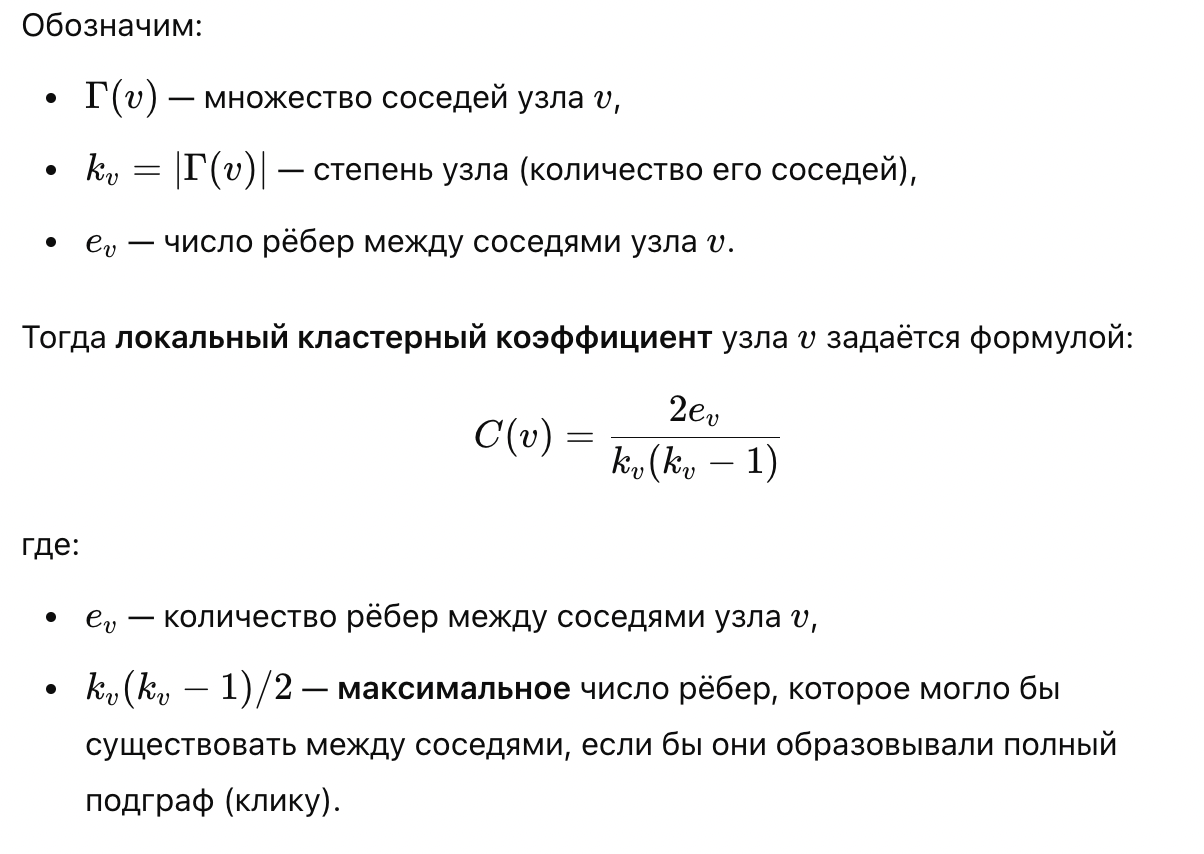

In [ ]:
img_path = '/content/drive/MyDrive/data/Local_Cf.png'
display(Image(filename=img_path, width=600))

#### Средний кластерный коэффициент графа (Global Clustering Coefficient)

**Global Clustering Coefficient** показывает среднюю вероятность того, что два случайных соседа вершины соединены между собой.

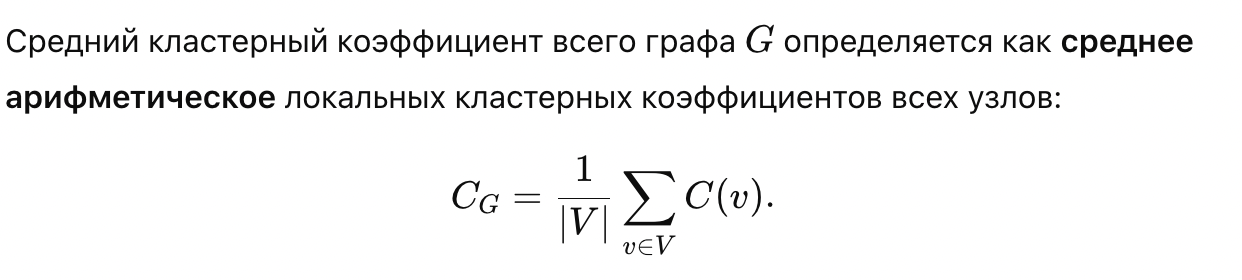

In [ ]:
img_path = '/content/drive/MyDrive/data/Global_Cl.png'
display(Image(filename=img_path, width=600))

#### Коэффициент транзитивности (Transitivity Coefficient)

Иногда вместо среднего кластерного коэффициена графа используют глобальную транзитивность (**Transitivity Coefficient**), основанную на количестве треугольников в графе.



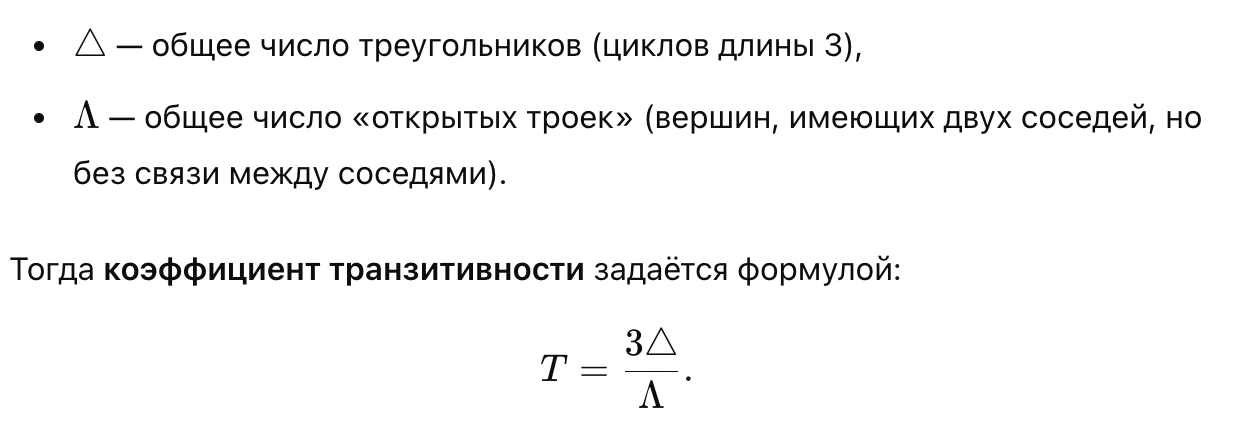

In [ ]:
img_path = '/content/drive/MyDrive/data/Transitivity_Cf.png'
display(Image(filename=img_path, width=600))

 Показывает вероятность того, что два узла, имеющих общего соседа, также соединены между собой.

 Отличие от среднего кластерного коэффициена графа: коэффициент транзитивности учитывает весь граф, а не усреднение локальных значений.

In [ ]:
# Вычисление локального кластерного коэффициента
clustering = nx.clustering(G)
print("Кластерный коэффициент для каждого узла:", clustering)

# Средний кластерный коэффициент
average_clustering = nx.average_clustering(G)
print("Средний кластерный коэффициент:", average_clustering)

# Коэффициент транзитивности
transitivity = nx.transitivity(G)
print("Коэффициент транзитивности:", transitivity)

Кластерный коэффициент для каждого узла: {'A': 1.0, 'B': 1.0, 'C': 0.3333333333333333, 'D': 0, 'E': 0}
Средний кластерный коэффициент: 0.4666666666666667
Коэффициент транзитивности: 0.5


Результат:

- Кластерный коэффициент для каждого узла указывает, насколько связаны его соседи.
- Средний кластерный коэффициент характеризует граф в целом

Интерпретация и применение:

- В социальных сетях высокий кластерный коэффициент означает, что у друзей одного человека есть высокая вероятность быть знакомыми друг с другом.

- В биологических сетях высокий коэффициент указывает на сильные функциональные связи между группами белков или молекул.

- В веб-графах сети с высоким
средним кластерным коэффициентом имеют тенденцию к образованию «кластеров» или сообществ.

### Подсчёт кратчайших путей

In [ ]:
# Кратчайшие пути между всеми парами узлов
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
print("Кратчайшие пути между всеми парами узлов:", shortest_paths)

# Средняя длина пути
average_path_length = nx.average_shortest_path_length(G)
print("Средняя длина пути:", average_path_length)


Кратчайшие пути между всеми парами узлов: {'A': {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 3}, 'B': {'B': 0, 'A': 1, 'C': 1, 'D': 2, 'E': 3}, 'C': {'C': 0, 'B': 1, 'A': 1, 'D': 1, 'E': 2}, 'D': {'D': 0, 'C': 1, 'E': 1, 'B': 2, 'A': 2}, 'E': {'E': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 3}}
Средняя длина пути: 1.7


Результат:

- Кратчайшие пути показывают минимальное число шагов между всеми парами узлов.
- Средняя длина пути характеризует связность графа.

### Диаметры и радиусы графа

In [ ]:
# Диаметр графа (максимальная длина кратчайшего пути)
diameter = nx.diameter(G)
print("Диаметр графа:", diameter)

# Радиус графа (минимальное эксцентриситетное расстояние)
radius = nx.radius(G)
print("Радиус графа:", radius)


Диаметр графа: 3
Радиус графа: 2


Результат:

- Диаметр графа: максимальное расстояние между двумя узлами.
- Радиус графа: минимальное из максимальных расстояний от узла до других.


### Поиск сообществ

Модульность (Modularity)

**Модульность** — это мера, которая показывает, насколько хорошо граф можно разделить на сообщества (кластеры), в которых узлы связаны плотнее, чем с остальными узлами сети.

Источник: https://www.nature.com/articles/s41598-024-55190-7

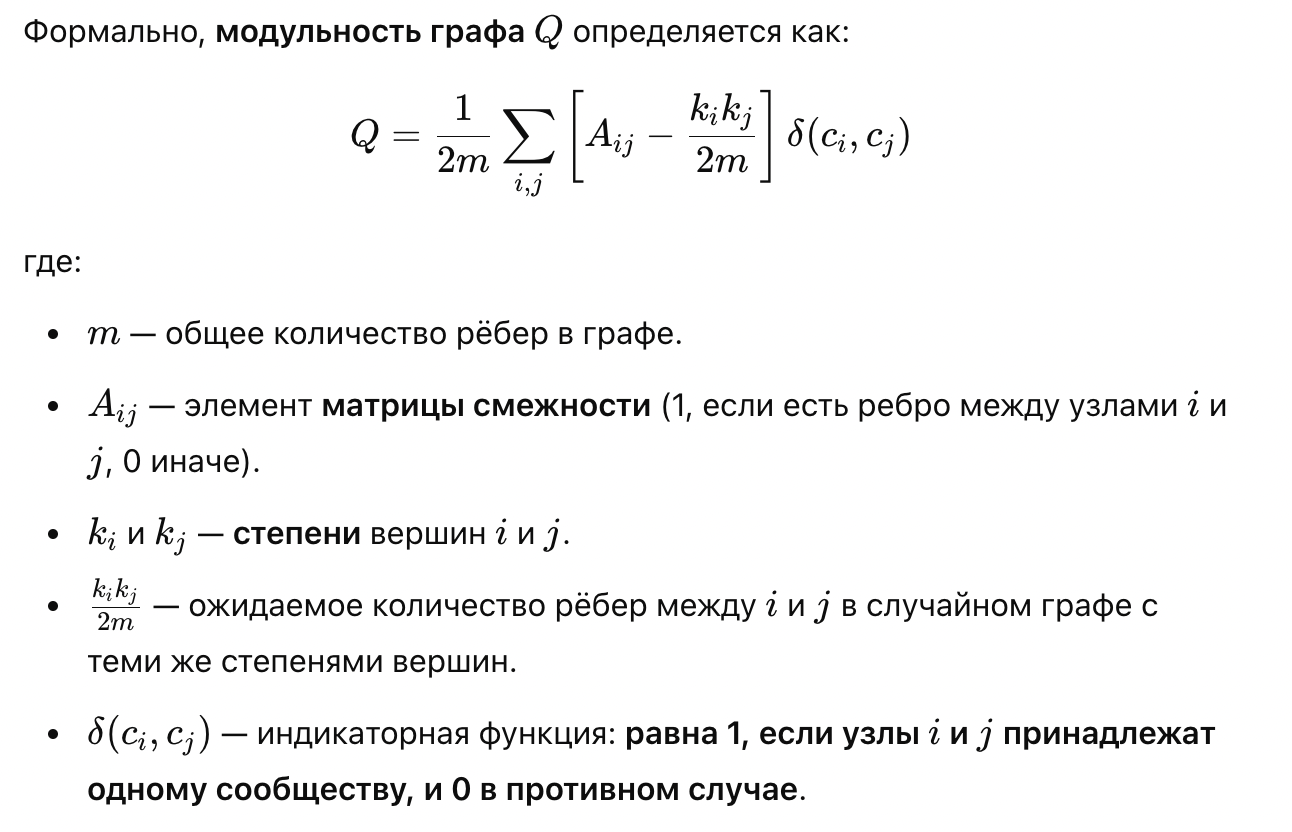

In [ ]:
img_path = '/content/drive/MyDrive/data/modularity.png'
display(Image(filename=img_path, width=600))

Смысл модульности:

- Высокая модульность означает, что узлы внутри сообществ сильно связаны друг с другом, а связи между сообществами слабые.
- Максимизация 𝑄 позволяет найти естественное разбиение сети на кластеры.

#### Алгоритм модульности

Или жадный алгоритм (Greedy Modularity Optimization), предложен Клодом (Clauset), Ньюманом (Newman) и Муром (Moore) в 2004 году

**Основная идея алгоритма**:

Алгоритм постепенно объединяет узлы в сообщества так, чтобы максимизировать модульность 𝑄.

Этапы работы алгоритма
1. Инициализация:
    - Каждая вершина считается отдельным сообществом.
    - Модульность сети изначально низкая, так как все узлы раздельны.

2. Жадное объединение:
    - По очереди объединяем те сообщества, при слиянии которых модульность 𝑄 увеличивается больше всего.
    - На каждом шаге считаем дельту модульности Δ𝑄, если объединить два сообщества.

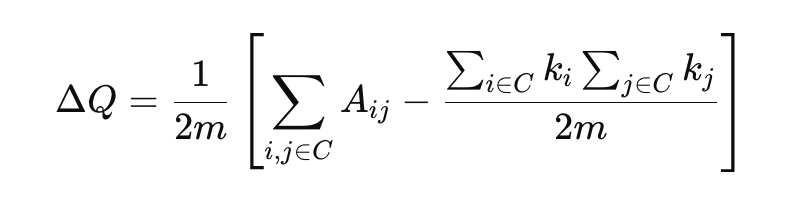

In [ ]:
img_path = '/content/drive/MyDrive/data/Greedy_modularity_optimization.png'
display(Image(filename=img_path, width=400))

2.
    - Если объединение двух сообществ даёт наибольший прирост Δ𝑄, мы его выполняем.

3. Остановка:
    - Когда больше нельзя увеличить модульность, алгоритм завершает работу.

In [ ]:
from networkx.algorithms import community

# Использование алгоритма модульности для поиска сообществ
communities = community.greedy_modularity_communities(G)

# Выводим количество найденных сообществ
print(f"Найдено {len(communities)} сообществ")

# Выведем узлы, входящие в каждое сообщество
for i, comm in enumerate(communities):
    print(f"Сообщество {i+1}: {sorted(comm)}")


Найдено 2 сообществ
Сообщество 1: ['A', 'B', 'C']
Сообщество 2: ['D', 'E']


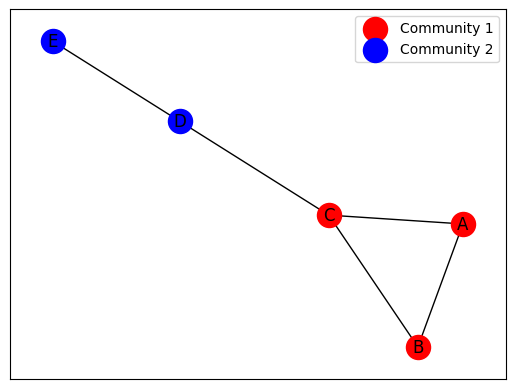

In [ ]:
import matplotlib.pyplot as plt

# Генерируем цвета
colors = ['red', 'blue']

# Отображаем граф
pos = nx.spring_layout(G)
for i, comm in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f"Community {i+1}")

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.legend()
plt.show()

In [ ]:
# Создаём граф
G = nx.karate_club_graph()  # Классический граф сообществ

# Запускаем алгоритм модульности
communities = list(community.greedy_modularity_communities(G))

# Выводим количество найденных сообществ
print(f"Найдено {len(communities)} сообществ")

# Выведем узлы, входящие в каждое сообщество
for i, comm in enumerate(communities):
    print(f"Сообщество {i+1}: {sorted(comm)}")



Найдено 3 сообществ
Сообщество 1: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Сообщество 2: [1, 2, 3, 7, 9, 12, 13, 17, 21]
Сообщество 3: [0, 4, 5, 6, 10, 11, 16, 19]


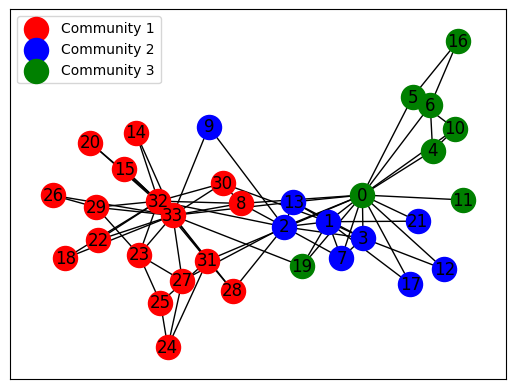

In [ ]:
# Генерируем цвета
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray']

# Отображаем граф
pos = nx.spring_layout(G)
for i, comm in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=comm, node_color=colors[i % len(colors)], label=f"Community {i+1}")

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.legend()
plt.show()


Подробнее о доступных методах: https://networkx.org/documentation/stable/reference/algorithms/community.html

Результат:
- Сообщества группируют узлы, которые более плотно связаны друг с другом.



Ссылки на дополнительные источники: https://networkx.org/

# PyTorch Geometric

PyTorch Geometric — это библиотека для обучения графовых нейронных сетей. Она предоставляет мощные инструменты для работы с большими графами и построения GNN.



Основные возможности PyTorch Geometric:
- Поддержка популярных архитектур: GCN, GAT, GraphSAGE и др.
- Эффективная работа с большими графами.
- Интеграция с PyTorch.
- Поддержка тензорных операций для графов.

Примеры использования PyTorch Geometric. Создание графа

In [ ]:
# pip install torch_geometric

In [ ]:
import torch
from torch_geometric.data import Data

# Определение рёбер графа
edge_index = torch.tensor([
    [0, 1, 1, 2, 2, 3],
    [1, 0, 2, 1, 3, 2]
], dtype=torch.long)

# Определение признаков узлов
x = torch.tensor([
    [1, 0],
    [0, 1],
    [1, 1]
], dtype=torch.float)

# Создание объекта графа
graph = Data(x=x, edge_index=edge_index)
print(graph)


Data(x=[3, 2], edge_index=[2, 6])


C помощью PyTorch Geometric нельзя визуализировать графы. Для этого можно использовать популярные библиотеки, такие как Matplotlib или NetworkX, совместно с данными из PyTorch Geometric.

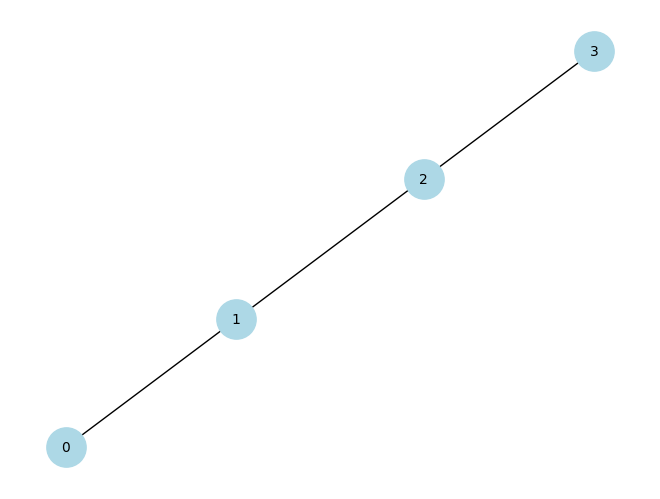

In [ ]:
# Конвертация в граф NetworkX
G = nx.Graph()
edges = graph.edge_index.t().tolist()  # Преобразование рёбер в список
G.add_edges_from(edges)

# Визуализация графа
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.show()

Визуализация веса рёбер



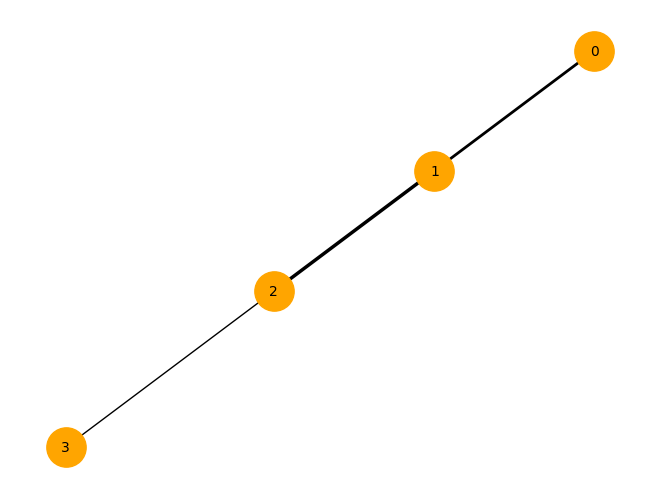

In [ ]:
# Добавляем веса рёбер
edge_weights = [1.0, 2.0, 1.5, 2.5, 3.0, 1.0]  # Пример весов
nx.set_edge_attributes(G, {tuple(edge): weight for edge, weight in zip(edges, edge_weights)}, "weight")

# Визуализация с шириной рёбер, соответствующей их весам
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, "weight")
nx.draw(G, pos, with_labels=True, node_color="orange", node_size=800, font_size=10,
        width=[weights[edge] for edge in G.edges])
plt.show()


Результат:
- Толщина рёбер графа пропорциональна их весам.

Ссылка на источники: https://pytorch-geometric.readthedocs.io/en/latest/#